In [84]:
from tensorflow.keras.datasets import imdb

In [85]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words= 10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\usuario\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\usuario\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays

In [86]:
import numpy as np

def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [87]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [113]:
len(x_train)

25000

In [88]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [90]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [92]:
history_orig = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6244 - accuracy: 0.6655 - val_loss: 0.4288 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3603 - accuracy: 0.9021 - val_loss: 0.3254 - val_accuracy: 0.8815
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2441 - accuracy: 0.9315 - val_loss: 0.2990 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1839 - accuracy: 0.9471 - val_loss: 0.2800 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1443 - accuracy: 0.9588 - val_loss: 0.3150 - val_accuracy: 0.8727
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1220 - accuracy: 0.9675 - val_loss: 0.3214 - val_accuracy: 0.8796
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0957 - accuracy: 0.9741 - val_loss: 0.3124 - val_accuracy: 0.8831
Epoch 8/20
30

In [93]:
results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

782/782 [==============================] - 1s 1ms/step - loss: 0.7421 - accuracy: 0.8518
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.7420620918273926, 0.8517600297927856]


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

model_reg = Sequential()
model_reg.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_reg.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_reg.add(Dense(1, activation='sigmoid'))

In [95]:
model_reg.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
history_reg = model_reg.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6341 - accuracy: 0.7022 - val_loss: 0.4366 - val_accuracy: 0.8612
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3712 - accuracy: 0.9021 - val_loss: 0.3730 - val_accuracy: 0.8706
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2870 - accuracy: 0.9223 - val_loss: 0.3302 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2428 - accuracy: 0.9379 - val_loss: 0.3276 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2221 - accuracy: 0.9459 - val_loss: 0.3292 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1995 - accuracy: 0.9588 - val_loss: 0.3590 - val_accuracy: 0.8771
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1972 - accuracy: 0.9529 - val_loss: 0.3963 - val_accuracy: 0.8683
Epoch 8/20
30

In [97]:
results = model_reg.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

782/782 [==============================] - 1s 1ms/step - loss: 0.4784 - accuracy: 0.8611
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.4783976972103119, 0.8610799908638]


In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_drop = Sequential()

#model_drop.add(Dropout(0.3, input_shape=(10000,)))
model_drop.add(Dense(16, activation='relu', input_shape=(10000,)))

model_drop.add(Dropout(0.5))
model_drop.add(Dense(16, activation='relu'))

model_drop.add(Dropout(0.5))
model_drop.add(Dense(1, activation='sigmoid'))

In [99]:
model_drop.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
history_drop = model_drop.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6500 - accuracy: 0.6067 - val_loss: 0.4831 - val_accuracy: 0.8492
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4974 - accuracy: 0.7806 - val_loss: 0.4067 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4180 - accuracy: 0.8381 - val_loss: 0.3402 - val_accuracy: 0.8820
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3588 - accuracy: 0.8669 - val_loss: 0.3084 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3181 - accuracy: 0.8902 - val_loss: 0.2943 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2762 - accuracy: 0.9157 - val_loss: 0.3082 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2535 - accuracy: 0.9248 - val_loss: 0.2828 - val_accuracy: 0.8877
Epoch 8/20
30

In [101]:
results = model_drop.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)

782/782 [==============================] - 1s 1ms/step - loss: 0.5978 - accuracy: 0.8730
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.597791850566864, 0.8730000257492065]


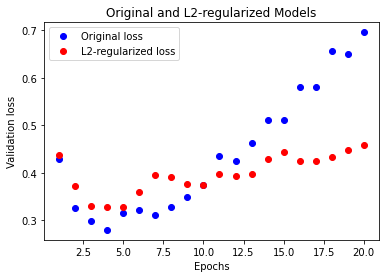

In [110]:
import matplotlib.pyplot as plt

plt.clf()
#history_orig = history_orig.history
#history_reg = history_reg.history
origi_val_loss_values = history_orig['val_loss']
regul_val_loss_values = history_reg['val_loss']
epochs = range(1, (len(history_orig['loss']) + 1))
plt.plot(epochs, origi_val_loss_values, 'bo', label='Original loss')
plt.plot(epochs, regul_val_loss_values, 'ro' , label='L2-regularized loss')
plt.title('Original and L2-regularized Models')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

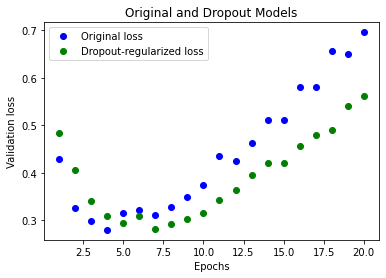

In [112]:
import matplotlib.pyplot as plt

plt.clf()
#history_orig = history_orig.history
#history_drop = history_drop.history
origi_val_loss_values = history_orig['val_loss']
drop_val_loss_values = history_drop['val_loss']
epochs = range(1, (len(history['loss']) + 1))
plt.plot(epochs, origi_val_loss_values, 'bo', label='Original loss')
plt.plot(epochs, drop_val_loss_values, 'go' , label='Dropout-regularized loss')
plt.title('Original and Dropout Models')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()